<div>
<h1>Solve Xporters traffic volume problem</h1>
<em><font size="-2">Organisers : Alexis de Russ&eacute;, Florian Bertelli, Gaspard Donada--Vidal, Ghassen Chaabane, Moez Ezzeddine, Ziheng Li</font></em>
<hr>
<figure><img src="logo.jpg", width=300, border=20 style="float:left;margin:5px"></figure>
<p><br>This code was tested with Python 3.7 |Anaconda custom (64-bit)| (Oct 01 2019, 11:07:29) (<a href="https://anaconda.org/">https://anaconda.org/</a>).<br>
<font size="-3">ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</font></p></div>

<div>
    <h2>Introduction </h2>
    <p>
With globalization, our world tends to be more and more connected, so this implies more and more transport. There
 are various types of transports: transports of goods, energy, information, or people.This century will be marked by a revolution in the transport of people. With the development of autonomous cars, more and more data will be collected: speed, location, population,etc. The challenge is to get value from this. As the number of cars, and particularly autonomous cars tends to grow, we'll need to deal with an increasing traffic flow to avoid huge traffic jams. Indeed, some experts pretend that autonomous vehicles will be able to reduce travelling timeup to 30%, even if the world traffic increases of 10%.
But how is it possible to reduce travelling time and traffic jams if the number of vehicles increases ? Thanks to prediction. <br>
        In fact, prediction will be the key to determine the fastest way to get you from your home to your work, without getting in traffic jams. Predictions may also be used to determine which transportation infrastructures to
build.
            <p>
Xporters challenge is a small standard multivariable regression data set from the <a href="http://archive.ics.uci.edu/ml/datasets/">UCI Machine Learning Repository</a>, formatted in the AutoML format. It uses a data set concerning the traffic volume off an highway in the USA from 2012 to 2018, the date, and some informations about the weather. The aim of this challenge is to predict the traffic volume thanks to this features
</div>

In [1]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
sns.set()

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
</div>

In [3]:
from data_io import read_as_df
data_dir = '/Users/Mario/Downloads/XPORTERS/AUTOBUS2/starting_kit'       # Change this to the directory where you put the input data
data_dir = './all_data'          # The sample_data directory should contain only a very small subset of the data
data_name = 'xporters'
!ls $data_dir*

'ls' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [4]:
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading ./all_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


In [5]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
0,0,267.510,0.0,0.0,40,85.821965,6,1,12,2017,...,0,0,0,0,0,0,0,0,0,759.0
1,0,293.720,0.0,0.0,90,72.271517,5,11,6,2018,...,0,0,0,0,0,0,0,0,0,4085.0
2,0,302.180,0.0,0.0,0,65.922514,1,19,7,2013,...,0,0,0,0,0,0,0,0,0,3528.0
3,0,255.580,0.0,0.0,75,90.673493,1,5,2,2014,...,0,0,0,0,0,0,0,0,0,2636.0
4,0,286.381,0.0,0.0,0,97.325080,2,18,10,2016,...,0,0,0,0,0,0,0,0,0,4226.0


In [6]:
data.describe() 

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,...,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,0.001245,281.197804,0.379081,0.000203,49.350284,80.079942,2.984311,11.408578,6.518009,2015.510645,...,0.000337,0.005990,0.002515,0.000052,0.001167,0.000363,0.001193,0.000856,0.000415,3258.740788
std,0.035259,13.239935,50.073028,0.007602,39.029958,9.992938,2.003339,6.947282,3.405988,1.892133,...,0.018358,0.077165,0.050091,0.007202,0.034141,0.019050,0.034518,0.029241,0.020365,1987.121630
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.724760,0.000000,0.000000,1.000000,2012.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,73.343967,1.000000,5.000000,4.000000,2014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1195.000000
50%,0.000000,282.341000,0.000000,0.000000,64.000000,80.134711,3.000000,11.000000,7.000000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3377.000000
75%,0.000000,291.790000,0.000000,0.000000,90.000000,86.771668,5.000000,17.000000,9.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4933.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,128.465356,6.000000,23.000000,12.000000,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7260.000000


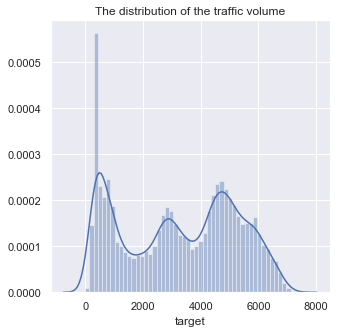

In [7]:
plt.figure(figsize = (5,5))
sns.distplot(data['target'], bins=50)
plt.title('The distribution of the traffic volume')
plt.show()

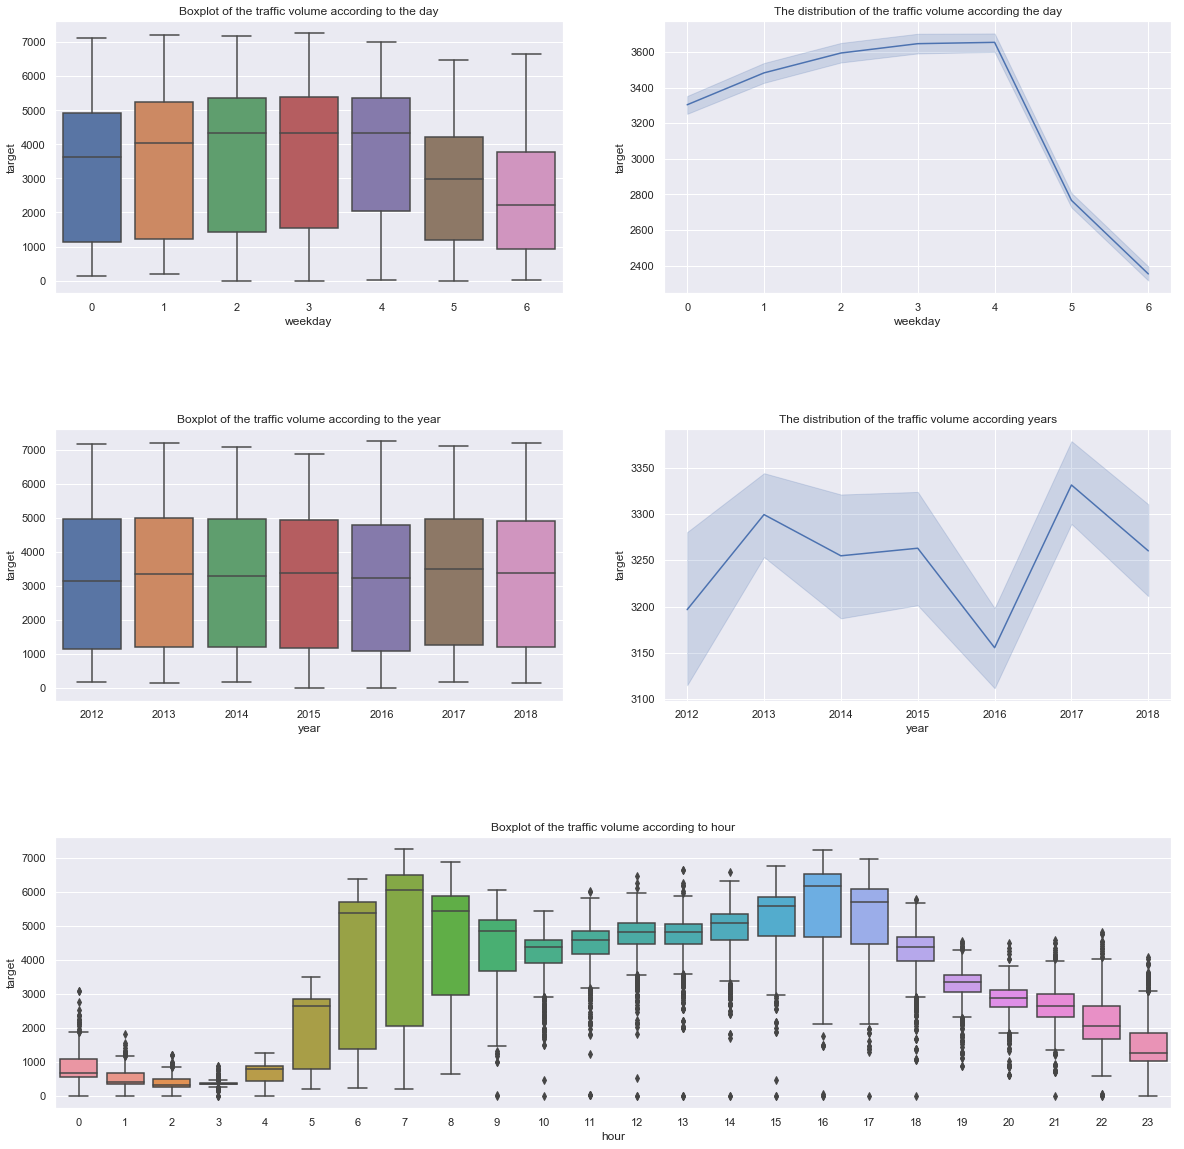

In [8]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(313)
sns.boxplot('hour','target', data= data)
plt.title('Boxplot of the traffic volume according to hour')

plt.subplot(321)
sns.boxplot('weekday','target', data= data)
plt.title('Boxplot of the traffic volume according to the day')
plt.subplot(322)
sns.lineplot('weekday','target', data= data)
plt.title("The distribution of the traffic volume according the day")

plt.subplot(323)
sns.boxplot('year','target', data= data)
plt.title('Boxplot of the traffic volume according to the year')
plt.subplot(324)
sns.lineplot('year','target', data= data)
plt.title("The distribution of the traffic volume according years")
plt.show()

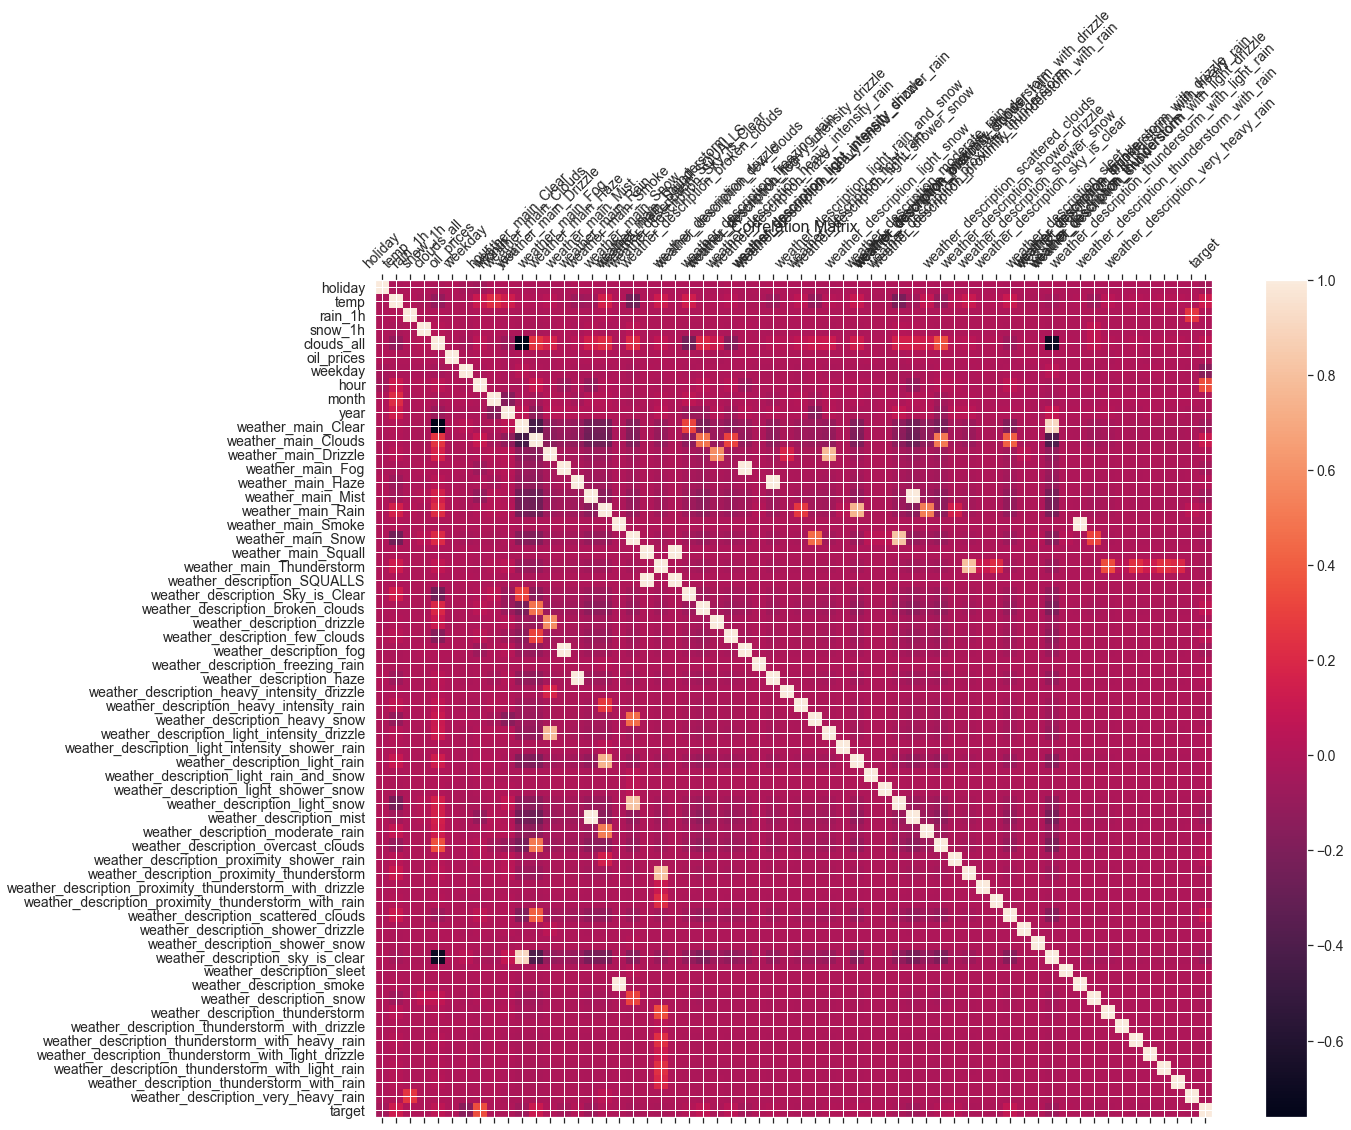

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
print('Most important features according to the correlation with target')
most_important_features = data.corr()['target'].sort_values(ascending=False)[:10]
print (data.corr()['target'].sort_values(ascending=False)[:10], '\n')

Most important features according to the correlation with target
target                                       1.000000
hour                                         0.350545
temp                                         0.131803
weather_main_Clouds                          0.119544
weather_description_scattered_clouds         0.083946
weather_description_broken_clouds            0.065639
clouds_all                                   0.064201
weather_description_few_clouds               0.044360
weather_description_proximity_shower_rain    0.034044
weather_main_Haze                            0.019314
Name: target, dtype: float64 



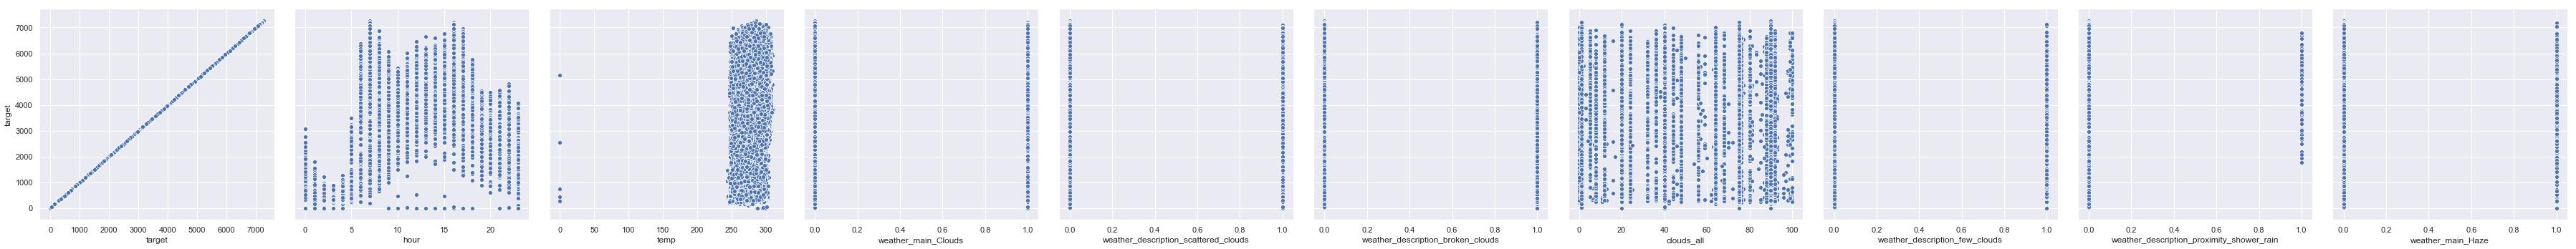

In [11]:
a = list(most_important_features.index)
sns.pairplot(data,height= 5, x_vars = a , y_vars = 'target')
plt.show()

<div>
<h1>Step 2: Building a predictive model</h1>
</div>

<div>
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
   <br>     <span style="color:red"> Keep this, it illustrates how data in AutoML formal are loaded by the ingestion program </span>
</div>

In [12]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : C:\Users\Mario\Downloads\XPORTERS\AUTOBUS2\starting_kit\all_data\xporters_public.info
DataManager : xporters
info:
	usage = Sample dataset Traffic Volume data
	name = traffic
	task = regression
	target_type = Numerical
	feat_type = Numerical
	metric = r2_metric
	time_budget = 1200
	feat_num = 59
	target_num = 3
	label_num = 3
	train_num = 35
	valid_num = 35
	test_num = 35
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(38563, 59)
	Y_train = array(38563,)
	X_valid = array(4820, 59)
	Y_valid = array(0,)
	X_test = array(4820, 59)
	Y_test = array(0,)
feat_type:	array(59,)
feat_idx:	array(0,)



<div>
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [13]:
from data_io import write
#from model import model
# Uncomment the next line to show the code of the model
#??model 

In [14]:
#AJOUT DE CELLULE A PARTIR D'ICI (Travail de Marion Pobelle)

In [15]:
"""
We will use the models from TP2 'Pandas'. We look at each of the model description to see if they have a regressor version.
If indeed there is one, we change that in our program. If there is none, we delete the model from the code.We will select 5 models.
We will start with hyper-parameters from TP2 too search for the best model to suit our data, then we will try to find the best 
hyper-parameters to increase our program performance. We will look at each model score to determine which one is the best.
We will look at the performance obtained on the validating dataset but also on the training dataset to prevent over-fitting.
As we do not have the official valid and test dataset, we will use the train_test_split function from the scikit-learn
library. We will keep the two models which have the best score on the valid dataset.
"""

"\nWe will use the models from TP2 'Pandas'. We look at each of the model description to see if they have a regressor version.\nIf indeed there is one, we change that in our program. If there is none, we delete the model from the code. We will start with\nhyper-parameters from TP2 too search for the best model to suit our data, then we will try to find the best hyper-parameters\nto increase our program performance. We will look at each model score to determine which one is the best.\nWe will look at the performance obtained on the validating dataset but also on the training dataset to prevent over-fitting.\nAs we do not have the official valid and test dataset, we will use the train_test_split function from the scikit-learn\nlibrary. We will keep the two models which have the best score on the valid dataset.\n"

In [16]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_name = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest"]
model_list = [
    KNeighborsRegressor(3),
    SVR(kernel="linear", C=0.025),
    SVR(gamma=2, C=1),
    DecisionTreeRegressor(max_depth=10),
    RandomForestRegressor(max_depth=10, n_estimators=10, max_features=1)]

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
from libscores import get_metric
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

<div>
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

Nearest Neighbors
Using scoring metric: r2_metric
Training score for the r2_metric metric = 0.8733
Validing score for the r2_metric metric = 0.7424
Ideal score for the r2_metric metric = 1.0000


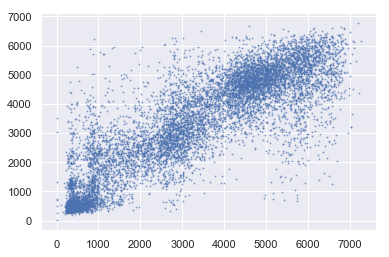


CV score (95 perc. CI): 0.73 (+/- 0.01)


In [18]:
    M = model_list[0]
    print(model_name[0])
    trained_model_name = model_dir + data_name
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    Xsplit_train, Xsplit_valid, Ysplit_train, Ysplit_valid = train_test_split(X_train, Y_train)
    M.fit(Xsplit_train, Ysplit_train)                     
    Y_hat_train = M.predict(Xsplit_train) # Optional, not really needed to test on taining examples
    Y_hat_valid = M.predict(Xsplit_valid)
    Y_hat_test = M.predict(D.data['X_test'])
    result_name = result_dir + data_name
    from data_io import write
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    metric_name, scoring_function = get_metric()
    print('Using scoring metric:', metric_name)
    print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Y_hat_train))
    print('Validing score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_valid, Y_hat_valid))
    print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Ysplit_train))
    plt.scatter(Ysplit_valid, Y_hat_valid, alpha ='0.5', s = 1 )
    plt.show()
    scores = cross_val_score(M, Xsplit_train, Ysplit_train, cv=5, scoring=make_scorer(scoring_function))
    print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Linear SVM
Using scoring metric: r2_metric
Training score for the r2_metric metric = 0.1241
Validing score for the r2_metric metric = -0.3535
Ideal score for the r2_metric metric = 1.0000


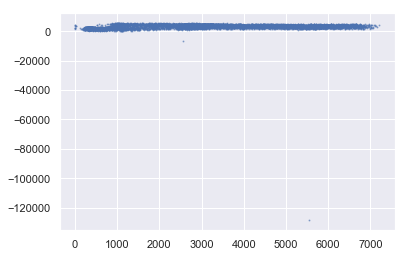


CV score (95 perc. CI): 0.12 (+/- 0.02)


In [19]:
    M = model_list[1]
    print(model_name[1])
    trained_model_name = model_dir + data_name
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    Xsplit_train, Xsplit_valid, Ysplit_train, Ysplit_valid = train_test_split(X_train, Y_train)
    M.fit(Xsplit_train, Ysplit_train)                     
    Y_hat_train = M.predict(Xsplit_train) # Optional, not really needed to test on taining examples
    Y_hat_valid = M.predict(Xsplit_valid)
    Y_hat_test = M.predict(D.data['X_test'])
    result_name = result_dir + data_name
    from data_io import write
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    metric_name, scoring_function = get_metric()
    print('Using scoring metric:', metric_name)
    print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Y_hat_train))
    print('Validing score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_valid, Y_hat_valid))
    print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Ysplit_train))
    plt.scatter(Ysplit_valid, Y_hat_valid, alpha ='0.5', s = 1 )
    plt.show()
    scores = cross_val_score(M, Xsplit_train, Ysplit_train, cv=5, scoring=make_scorer(scoring_function))
    print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

RBF SVM
Using scoring metric: r2_metric
Training score for the r2_metric metric = -0.0029
Validing score for the r2_metric metric = -0.0035
Ideal score for the r2_metric metric = 1.0000


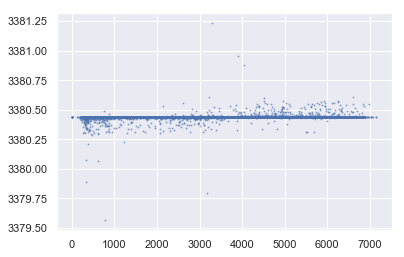


CV score (95 perc. CI): -0.00 (+/- 0.00)


In [20]:
    M = model_list[2]
    print(model_name[2])
    trained_model_name = model_dir + data_name
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    Xsplit_train, Xsplit_valid, Ysplit_train, Ysplit_valid = train_test_split(X_train, Y_train)
    M.fit(Xsplit_train, Ysplit_train)                     
    Y_hat_train = M.predict(Xsplit_train) # Optional, not really needed to test on taining examples
    Y_hat_valid = M.predict(Xsplit_valid)
    Y_hat_test = M.predict(D.data['X_test'])
    result_name = result_dir + data_name
    from data_io import write
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    metric_name, scoring_function = get_metric()
    print('Using scoring metric:', metric_name)
    print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Y_hat_train))
    print('Validing score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_valid, Y_hat_valid))
    print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Ysplit_train))
    plt.scatter(Ysplit_valid, Y_hat_valid, alpha ='0.5', s = 1 )
    plt.show()
    scores = cross_val_score(M, Xsplit_train, Ysplit_train, cv=5, scoring=make_scorer(scoring_function))
    print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Decision Tree
Using scoring metric: r2_metric
Training score for the r2_metric metric = 0.9489
Validing score for the r2_metric metric = 0.9358
Ideal score for the r2_metric metric = 1.0000


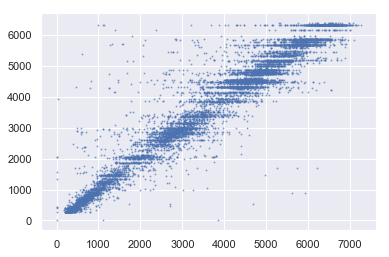


CV score (95 perc. CI): 0.93 (+/- 0.01)


In [21]:
    M = model_list[3]
    print(model_name[3])
    trained_model_name = model_dir + data_name
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    Xsplit_train, Xsplit_valid, Ysplit_train, Ysplit_valid = train_test_split(X_train, Y_train)
    M.fit(Xsplit_train, Ysplit_train)                     
    Y_hat_train = M.predict(Xsplit_train) # Optional, not really needed to test on taining examples
    Y_hat_valid = M.predict(Xsplit_valid)
    Y_hat_test = M.predict(D.data['X_test'])
    result_name = result_dir + data_name
    from data_io import write
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    metric_name, scoring_function = get_metric()
    print('Using scoring metric:', metric_name)
    print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Y_hat_train))
    print('Validing score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_valid, Y_hat_valid))
    print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Ysplit_train))
    plt.scatter(Ysplit_valid, Y_hat_valid, alpha ='0.5', s = 1 )
    plt.show()
    scores = cross_val_score(M, Xsplit_train, Ysplit_train, cv=5, scoring=make_scorer(scoring_function))
    print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Random Forest
Using scoring metric: r2_metric
Training score for the r2_metric metric = 0.3950
Validing score for the r2_metric metric = 0.3844
Ideal score for the r2_metric metric = 1.0000


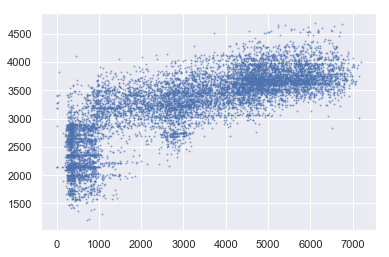


CV score (95 perc. CI): 0.32 (+/- 0.06)


In [22]:
    M = model_list[4]
    print(model_name[4])
    trained_model_name = model_dir + data_name
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    Xsplit_train, Xsplit_valid, Ysplit_train, Ysplit_valid = train_test_split(X_train, Y_train)
    M.fit(Xsplit_train, Ysplit_train)                     
    Y_hat_train = M.predict(Xsplit_train) # Optional, not really needed to test on taining examples
    Y_hat_valid = M.predict(Xsplit_valid)
    Y_hat_test = M.predict(D.data['X_test'])
    result_name = result_dir + data_name
    from data_io import write
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    metric_name, scoring_function = get_metric()
    print('Using scoring metric:', metric_name)
    print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Y_hat_train))
    print('Validing score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_valid, Y_hat_valid))
    print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Ysplit_train))
    plt.scatter(Ysplit_valid, Y_hat_valid, alpha ='0.5', s = 1 )
    plt.show()
    scores = cross_val_score(M, Xsplit_train, Ysplit_train, cv=5, scoring=make_scorer(scoring_function))
    print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

In [23]:
#DONNER LE NOM DES DEUX MODELES QUI MARCHENT ET DECRIRE LEUR PARAMETRES.

"""

    By looking at each model score, we see that the 'Decision Tree' and 'Nearest Neighbors' models are the one which fits our data the best.
    
    
    
'DECISION TREE'    
    
*It's first hyper-parameter is the criterion, which minimizes the loss on the data using different methods.

*The second one is splitter, which represent how the tree will be splitted at each node. The best split method
will give out better results. 

*max_depth, an integer, comes next and is used to indicate how deep the tree can be, preventing 'over-fitting' trees. Indeed, the
more leafs our tree will have, the less errors will appear on our data sample, but the tree will be difficult to generalize
to other data. It's a 'stop' criterion.

*Then there is the min_samples_split hyper-parameter, which is used to set a minimum value of samples required to split 
a node and can be an integer or a float. The smaller this number, the more nodes the Decision Tree algorithm will
have to separate and will therefore be slower.

*min_samples_leaf can be an integer or a float as well and is used to determine the minimum number of samples required to 
constitute a node. The tree wont split below that number resulting on a smooth effect on the model.

*min_weight_fraction_leaf is a float representing the weight of each sample.

*max_features can be an integer, a float or other values such as 'sqrt' or 'log2'. This hyper-parameter represent the number of features
to consider when looking for the best split. The more features the algorithm will have to look at, the slower it will be. If the number
of features to consider is too high, it could lead to an over-fitting situation.

*random_state is the seed used by the random number generator of the tree, but it wont be useful in our case.

*max_leaf_nodes is an integer which represent the maximum number of nodes which will be represented on the tree. The algorithm
will try to generate the best tree possible with that number.

*min_impurity_decrease is a float which is used to decrease the impurity of the tree. It can influence the training time.

*min_impurity_split is a float that is use to stop the tree growth before the end. If a node impurity is above that number, the tree
will continue to grow, else, the node will become a leaf. It reduce the training-time.

*To conclude, ccp_alpha is a non-negative float which determine the complexity of the algorithm. It influence the training time.



'NEAREST NEIGHBORS'

*It's first hyper-parameter is n_neighbors which is an integer that represents the number of neighbors to use by default.

*The second one is weights, which can take different values : 'uniform' that set all weight in each neighborhood equals, 'distance' which
set weight by the inverse of the distance of each point, which means closer neighbors will have more influence on the algorithm and finally [callable] 
which allow the user to define a function to use according to certain parameters. 'uniform' is used by default.

*algorithm which take as values 'auto' which decides the most appropriate algorithm to use, 'ball_tree' which use BallTree as the algorithm, 'kd_tree'
which use KDTree as the algorithm and finally 'brute' which is a brute-force search.

*leaf_size is an integer used to define the leaf size passed to the algorithm. It can affect the speed of the construction, the memory and a 
high size of leaf can generate over-fitting situations.

*p is an integer that represents the power parameter for the Minkowskin metric used in the algorithm. It set which distance
(euclidean, manhattan...) is used.

*Next, metric is the metric used for the tree. The default one is minkowski but this hyper-parameter can take the value [callable].

*metric_params represents additional keyword arguments for the metric function used.

*To conclude, n_jobs is an integer that defines the number of parallel jobs to run for the neighbors search.

"""

"\n\n    By looking at each model score, we see that the 'Decision Tree' and 'Nearest Neighbors' models are the one which fits our data the best.\n    \n    \n    \n'DECISION TREE'    \n    \n*It's first hyper-parameter is the criterion, which minimizes the loss on the data using different methods.\n\n*The second one is splitter, which represent how the tree will be splitted at each node. The best split method\nwill give out better results. \n\n*max_depth, an integer, comes next and is used to indicate how deep the tree can be, preventing 'over-fitting' trees. Indeed, the\nmore leafs our tree will have, the less errors will appear on our data sample, but the tree will be difficult to generalize\nto other data. It's a 'stop' criterion.\n\n*Then there is the min_samples_split hyper-parameter, which is used to set a minimum value of samples required to split \na node and can be an integer or a float. The smaller this number, the more nodes the Decision Tree algorithm will\nhave to separat

In [24]:
"""
'DECISION TREE'
    
    The most important hyper-parameters of a Decision Tree are max_depth, min_samples_split, min_samples_leaf
and max_features. In the case of max_depth, the deeper the tree is, the more informations about the data will
be considered. However if the value of max_depth is too large, the decision tree will overfits the data and will
fails to generalize new datas. min_samples_split specifies the minimum number of samples required to split a node.
This hyper-paramater also prevent overfitting and if small, reduce the training time. min_samples_leaf
represent the minimum number of samples required for a node to become a leaf, so the node wont split further.
This hyper-parameter also prevent over-fitting situation and reduce the training time. min_samples_split and
min_samples_leaf complete each other and work together to limit the number of split and leaf in the tree.
Finally, max_features represents the number of features to consider when looking for the best split. This
hyper-parameter can be used to control and prevent over-fitting as less features are considered.                                         


'NEAREST NEIGHBORS'

    The most important hyper-parameters for a Nearest Neighbors algorithm are weights, algorithm, n_neighbors, p and leaf_size. We will 
set weights as 'uniform' and algorithm as 'auto'. In the case of n_neighbors, using n_neighbors=1 means each sample is using itself as
reference, which is an overfitting case. We will try to find the most suitable number of neighbors to use. For p, the choice lays between the 
manhattan_distance when p=1 and euclidean_distance for p=2. When it comes to leaf_size, the higher it is, the more time the algorithm will
take to construct the model and also the more informations on the data will be used. We will try to do not have a too large number for this hyper-parameter
as we do not want to find ourselves in an over-fitting situation.



    We will use these hyper-parameters for our model to use on our data. We will use RandomizedSarchCV to try and find the best hyper-parameters
values for our model on a grid of hyper-parameter values chosen by looking at the information gave by DataManager. We will not use the exact
values provided by the information to prevent our model from over-fitting situations. We will print the progress of the Random Search on our two models
to see how it searches for the best hyper-parameters.

"""

"\n'DECISION TREE'\n    \n    The most important hyper-parameters of a Decision Tree are max_depth, min_samples_split, min_samples_leaf\nand max_features. In the case of max_depth, the deeper the tree is, the more informations about the data will\nbe considered. However if the value of max_depth is too large, the decision tree will overfits the data and will\nfails to generalize new datas. min_samples_split specifies the minimum number of samples required to split a node.\nThis hyper-paramater also prevent overfitting and if small, reduce the training time. min_samples_leaf\nrepresent the minimum number of samples required for a node to become a leaf, so the node wont split further.\nThis hyper-parameter also prevent over-fitting situation and reduce the training time. min_samples_split and\nmin_samples_leaf complete each other and work together to limit the number of split and leaf in the tree.\nFinally, max_features represents the number of features to consider when looking for the b

In [25]:
from sklearn.model_selection import RandomizedSearchCV as rear
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [30]:
#DECISION TREE

model_used = DecisionTreeRegressor()
parameters = {'min_samples_split': sp_randInt(2, 100),
                  'min_samples_leaf'    : sp_randInt(1, 100),
                  'max_features' : sp_randInt(4, 40),
                  'max_depth'    : sp_randInt(4, 12)
             }
print('Random Search : find the best hyper-parameters for Decision Tree Regressor')
trained_model_name = model_dir + data_name
X_train = D.data['X_train']
Y_train = D.data['Y_train']
model_used.fit(X_train, Y_train)                     
Y_hat_train = model_used.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = model_used.predict(D.data['X_valid'])
Y_hat_test = model_used.predict(D.data['X_test'])
random_search = rear(estimator = model_used, param_distributions = parameters, cv = 5, n_iter = 50, verbose=10)
random_search.fit(X_train, Y_train)

print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n", 
      random_search.best_estimator_)
print("\n The best score across ALL searched params:\n", random_search.best_score_)
print("\n The best parameters across ALL searched params:\n", random_search.best_params_)
print("\n ========================================================")

Random Search : find the best hyper-parameters for Decision Tree Regressor
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61 
[CV]  max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61, score=0.23775087234659772, total=   0.0s
[CV] max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61 
[CV]  max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61, score=0.8457664629414547, total=   0.0s
[CV] max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61, score=0.6792474802033446, total=   0.0s
[CV] max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61 
[CV]  max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61, score=0.7241688621451137, total=   0.0s
[CV] max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61 
[CV]  max_depth=5, max_features=25, min_samples_leaf=52, min_samples_split=61, score=0.605857039014496, total=   0.0s
[CV] max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55, score=0.8648197498749811, total=   0.0s
[CV] max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55 
[CV]  max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55, score=0.8411190757316993, total=   0.0s
[CV] max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55 
[CV]  max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55, score=0.807794261089618, total=   0.0s
[CV] max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55, score=0.8632237871586039, total=   0.0s
[CV] max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55 
[CV]  max_depth=8, max_features=18, min_samples_leaf=1, min_samples_split=55, score=0.8436184654401804, total=   0.0s
[CV] max_depth=6, max_features=14, min_samples_leaf=71, min_samples_split=72 
[CV]  max_depth=6, max_features=14, min_samples_leaf=71, min_samples_split=72, score=0.31062359122397043, total=   0.0s
[CV] max_depth=6, max_features=14, min_samples_leaf=71, min_samples_split=72 
[CV]  max_depth=6, max_features=14, min_samples_leaf=71, min_samples_split=72, score=0.7439562866679553, total=   0.0s
[CV] max_depth=6, max_features=14, min_samples_leaf=71, min_samples_split=72 
[CV]  max_depth=6, max_features=14, min_samples_leaf=71, min_samples_split=72, score=0.7415529452651907, total=   0.0s
[CV] max_depth=6, max_features=14, min_samples_leaf=71, min_samples_split=72 
[CV]  max_depth=6

[CV]  max_depth=10, max_features=5, min_samples_leaf=19, min_samples_split=40, score=0.4094425076340664, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=19, min_samples_split=40 
[CV]  max_depth=10, max_features=5, min_samples_leaf=19, min_samples_split=40, score=0.1279913012440187, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=19, min_samples_split=40 
[CV]  max_depth=10, max_features=5, min_samples_leaf=19, min_samples_split=40, score=0.29863905606575747, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=19, min_samples_split=40 
[CV]  max_depth=10, max_features=5, min_samples_leaf=19, min_samples_split=40, score=0.34522414407502233, total=   0.0s
[CV] max_depth=10, max_features=5, min_samples_leaf=19, min_samples_split=40 
[CV]  max_depth=10, max_features=5, min_samples_leaf=19, min_samples_split=40, score=0.16147484390926695, total=   0.0s
[CV] max_depth=11, max_features=9, min_samples_leaf=86, min_samples_split=66 
[CV]  max_de

[CV]  max_depth=4, max_features=7, min_samples_leaf=39, min_samples_split=33, score=0.11051734967078408, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=39, min_samples_split=33 
[CV]  max_depth=4, max_features=7, min_samples_leaf=39, min_samples_split=33, score=0.06043025381255995, total=   0.0s
[CV] max_depth=4, max_features=7, min_samples_leaf=39, min_samples_split=33 
[CV]  max_depth=4, max_features=7, min_samples_leaf=39, min_samples_split=33, score=0.3924634365842369, total=   0.0s
[CV] max_depth=7, max_features=12, min_samples_leaf=30, min_samples_split=65 
[CV]  max_depth=7, max_features=12, min_samples_leaf=30, min_samples_split=65, score=0.5973285287611945, total=   0.0s
[CV] max_depth=7, max_features=12, min_samples_leaf=30, min_samples_split=65 
[CV]  max_depth=7, max_features=12, min_samples_leaf=30, min_samples_split=65, score=0.458609589461659, total=   0.0s
[CV] max_depth=7, max_features=12, min_samples_leaf=30, min_samples_split=65 
[CV]  max_depth=7, 

[CV]  max_depth=10, max_features=12, min_samples_leaf=80, min_samples_split=42, score=0.45197840550838114, total=   0.0s
[CV] max_depth=4, max_features=35, min_samples_leaf=27, min_samples_split=99 
[CV]  max_depth=4, max_features=35, min_samples_leaf=27, min_samples_split=99, score=0.6799431931579553, total=   0.0s
[CV] max_depth=4, max_features=35, min_samples_leaf=27, min_samples_split=99 
[CV]  max_depth=4, max_features=35, min_samples_leaf=27, min_samples_split=99, score=0.7457015089234899, total=   0.0s
[CV] max_depth=4, max_features=35, min_samples_leaf=27, min_samples_split=99 
[CV]  max_depth=4, max_features=35, min_samples_leaf=27, min_samples_split=99, score=0.8162721597495133, total=   0.0s
[CV] max_depth=4, max_features=35, min_samples_leaf=27, min_samples_split=99 
[CV]  max_depth=4, max_features=35, min_samples_leaf=27, min_samples_split=99, score=0.8520168833927618, total=   0.0s
[CV] max_depth=4, max_features=35, min_samples_leaf=27, min_samples_split=99 
[CV]  max_dep

[CV]  max_depth=8, max_features=36, min_samples_leaf=95, min_samples_split=40, score=0.9044473583325666, total=   0.0s
[CV] max_depth=8, max_features=36, min_samples_leaf=95, min_samples_split=40 
[CV]  max_depth=8, max_features=36, min_samples_leaf=95, min_samples_split=40, score=0.8942788602518232, total=   0.0s
[CV] max_depth=8, max_features=36, min_samples_leaf=95, min_samples_split=40 
[CV]  max_depth=8, max_features=36, min_samples_leaf=95, min_samples_split=40, score=0.9114218317351978, total=   0.0s
[CV] max_depth=10, max_features=27, min_samples_leaf=39, min_samples_split=46 
[CV]  max_depth=10, max_features=27, min_samples_leaf=39, min_samples_split=46, score=0.8868253404226604, total=   0.0s
[CV] max_depth=10, max_features=27, min_samples_leaf=39, min_samples_split=46 
[CV]  max_depth=10, max_features=27, min_samples_leaf=39, min_samples_split=46, score=0.8825460980761938, total=   0.0s
[CV] max_depth=10, max_features=27, min_samples_leaf=39, min_samples_split=46 
[CV]  max_

[CV]  max_depth=11, max_features=23, min_samples_leaf=14, min_samples_split=44, score=0.85553195475088, total=   0.0s
[CV] max_depth=7, max_features=12, min_samples_leaf=26, min_samples_split=72 
[CV]  max_depth=7, max_features=12, min_samples_leaf=26, min_samples_split=72, score=0.3790909212541972, total=   0.0s
[CV] max_depth=7, max_features=12, min_samples_leaf=26, min_samples_split=72 
[CV]  max_depth=7, max_features=12, min_samples_leaf=26, min_samples_split=72, score=0.6861382274466475, total=   0.0s
[CV] max_depth=7, max_features=12, min_samples_leaf=26, min_samples_split=72 
[CV]  max_depth=7, max_features=12, min_samples_leaf=26, min_samples_split=72, score=0.7638666779946228, total=   0.0s
[CV] max_depth=7, max_features=12, min_samples_leaf=26, min_samples_split=72 
[CV]  max_depth=7, max_features=12, min_samples_leaf=26, min_samples_split=72, score=0.6309317068452358, total=   0.0s
[CV] max_depth=7, max_features=12, min_samples_leaf=26, min_samples_split=72 
[CV]  max_depth=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   22.8s finished


Decision Tree
Using scoring metric: r2_metric
Training score for the r2_metric metric = 0.9131
Validing score for the r2_metric metric = 0.9109
Ideal score for the r2_metric metric = 1.0000


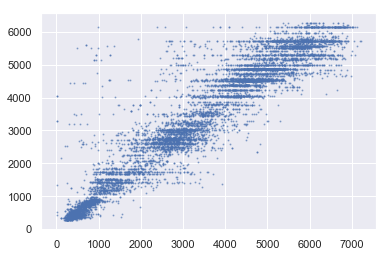


CV score (95 perc. CI): 0.93 (+/- 0.01)


In [31]:
    M = random_search.best_estimator_
    print("Decision Tree")
    trained_model_name = model_dir + data_name
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    Xsplit_train, Xsplit_valid, Ysplit_train, Ysplit_valid = train_test_split(X_train, Y_train)
    M.fit(Xsplit_train, Ysplit_train)                     
    Y_hat_train = M.predict(Xsplit_train) # Optional, not really needed to test on taining examples
    Y_hat_valid = M.predict(Xsplit_valid)
    Y_hat_test = M.predict(D.data['X_test'])
    result_name = result_dir + data_name
    from data_io import write
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    metric_name, scoring_function = get_metric()
    print('Using scoring metric:', metric_name)
    print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Y_hat_train))
    print('Validing score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_valid, Y_hat_valid))
    print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Ysplit_train))
    plt.scatter(Ysplit_valid, Y_hat_valid, alpha ='0.5', s = 1 )
    plt.show()
    scores = cross_val_score(M, Xsplit_train, Ysplit_train, cv=5, scoring=make_scorer(scoring_function))
    print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

In [27]:
#NEAREST NEIGHBORS

model_used = random_search.best_estimator_
parameters = {'n_neighbors': sp_randInt(3, 40),
              'leaf_size' : sp_randInt(20, 100),
                  'p'    : sp_randInt(1, 3)
             }
print('Random Search : find the best hyper-parameters for Decision Tree Regressor')
trained_model_name = model_dir + data_name
X_train = D.data['X_train']
Y_train = D.data['Y_train']
model_used.fit(X_train, Y_train)                     
Y_hat_train = model_used.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = model_used.predict(D.data['X_valid'])
Y_hat_test = model_used.predict(D.data['X_test'])
random_search = rear(estimator = model_used, param_distributions = parameters, cv = 5, n_iter = 50, verbose = 10)
random_search.fit(X_train, Y_train)

print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n", random_search.best_estimator_)
print("\n The best score across ALL searched params:\n", random_search.best_score_)
print("\n The best parameters across ALL searched params:\n", random_search.best_params_)
print("\n ========================================================")


Random Search : find the best hyper-parameters for Decision Tree Regressor
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] leaf_size=44, n_neighbors=7, p=2 ................................
[CV]  leaf_size=44, n_neighbors=7, p=2, score=0.7708945239417686, total=   4.2s
[CV] leaf_size=44, n_neighbors=7, p=2 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.4s remaining:    0.0s


[CV]  leaf_size=44, n_neighbors=7, p=2, score=0.7622895172627472, total=   4.7s
[CV] leaf_size=44, n_neighbors=7, p=2 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.6s remaining:    0.0s


[CV]  leaf_size=44, n_neighbors=7, p=2, score=0.7640457619422305, total=   4.3s
[CV] leaf_size=44, n_neighbors=7, p=2 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.3s remaining:    0.0s


[CV]  leaf_size=44, n_neighbors=7, p=2, score=0.7703981503464639, total=   1.6s
[CV] leaf_size=44, n_neighbors=7, p=2 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   57.1s remaining:    0.0s


[CV]  leaf_size=44, n_neighbors=7, p=2, score=0.7667826764023445, total=   4.0s
[CV] leaf_size=42, n_neighbors=6, p=2 ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s


[CV]  leaf_size=42, n_neighbors=6, p=2, score=0.7716009242446036, total=   3.8s
[CV] leaf_size=42, n_neighbors=6, p=2 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.5min remaining:    0.0s


[CV]  leaf_size=42, n_neighbors=6, p=2, score=0.7622857440524793, total=   3.8s
[CV] leaf_size=42, n_neighbors=6, p=2 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.7min remaining:    0.0s


[CV]  leaf_size=42, n_neighbors=6, p=2, score=0.762529871329713, total=   4.0s
[CV] leaf_size=42, n_neighbors=6, p=2 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.0min remaining:    0.0s


[CV]  leaf_size=42, n_neighbors=6, p=2, score=0.7716755733038321, total=   2.2s
[CV] leaf_size=42, n_neighbors=6, p=2 ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.1min remaining:    0.0s


[CV]  leaf_size=42, n_neighbors=6, p=2, score=0.7676254997066236, total=   4.5s
[CV] leaf_size=77, n_neighbors=19, p=2 ...............................
[CV]  leaf_size=77, n_neighbors=19, p=2, score=0.7382898019090938, total=   9.1s
[CV] leaf_size=77, n_neighbors=19, p=2 ...............................
[CV]  leaf_size=77, n_neighbors=19, p=2, score=0.7324465487489475, total=   6.0s
[CV] leaf_size=77, n_neighbors=19, p=2 ...............................
[CV]  leaf_size=77, n_neighbors=19, p=2, score=0.7378004756875716, total=   5.6s
[CV] leaf_size=77, n_neighbors=19, p=2 ...............................
[CV]  leaf_size=77, n_neighbors=19, p=2, score=0.7419533899095996, total=   2.2s
[CV] leaf_size=77, n_neighbors=19, p=2 ...............................
[CV]  leaf_size=77, n_neighbors=19, p=2, score=0.7372158500379937, total=   5.5s
[CV] leaf_size=80, n_neighbors=34, p=1 ...............................
[CV]  leaf_size=80, n_neighbors=34, p=1, score=0.7222182739353665, total=   9.6s
[CV] lea

[CV]  leaf_size=26, n_neighbors=20, p=2, score=0.7406528058808555, total=   1.7s
[CV] leaf_size=26, n_neighbors=20, p=2 ...............................
[CV]  leaf_size=26, n_neighbors=20, p=2, score=0.7346966198385045, total=   4.1s
[CV] leaf_size=70, n_neighbors=23, p=2 ...............................
[CV]  leaf_size=70, n_neighbors=23, p=2, score=0.7311066071583059, total=   5.2s
[CV] leaf_size=70, n_neighbors=23, p=2 ...............................
[CV]  leaf_size=70, n_neighbors=23, p=2, score=0.7218719793045015, total=   5.2s
[CV] leaf_size=70, n_neighbors=23, p=2 ...............................
[CV]  leaf_size=70, n_neighbors=23, p=2, score=0.7304138748511858, total=   5.3s
[CV] leaf_size=70, n_neighbors=23, p=2 ...............................
[CV]  leaf_size=70, n_neighbors=23, p=2, score=0.7342806533718096, total=   2.2s
[CV] leaf_size=70, n_neighbors=23, p=2 ...............................
[CV]  leaf_size=70, n_neighbors=23, p=2, score=0.7284276439304549, total=   5.9s
[CV] le

[CV]  leaf_size=45, n_neighbors=35, p=1, score=0.7241218564360399, total=   6.7s
[CV] leaf_size=45, n_neighbors=35, p=1 ...............................
[CV]  leaf_size=45, n_neighbors=35, p=1, score=0.7267259778125572, total=   3.2s
[CV] leaf_size=45, n_neighbors=35, p=1 ...............................
[CV]  leaf_size=45, n_neighbors=35, p=1, score=0.7205855090297679, total=   6.8s
[CV] leaf_size=45, n_neighbors=23, p=2 ...............................
[CV]  leaf_size=45, n_neighbors=23, p=2, score=0.7311066071583059, total=   5.0s
[CV] leaf_size=45, n_neighbors=23, p=2 ...............................
[CV]  leaf_size=45, n_neighbors=23, p=2, score=0.7218719793045015, total=   5.0s
[CV] leaf_size=45, n_neighbors=23, p=2 ...............................
[CV]  leaf_size=45, n_neighbors=23, p=2, score=0.7304138748511858, total=   4.5s
[CV] leaf_size=45, n_neighbors=23, p=2 ...............................
[CV]  leaf_size=45, n_neighbors=23, p=2, score=0.7342806533718096, total=   2.0s
[CV] le

[CV]  leaf_size=22, n_neighbors=15, p=1, score=0.7503123246498555, total=   5.4s
[CV] leaf_size=22, n_neighbors=15, p=1 ...............................
[CV]  leaf_size=22, n_neighbors=15, p=1, score=0.7526968766698318, total=   5.2s
[CV] leaf_size=22, n_neighbors=15, p=1 ...............................
[CV]  leaf_size=22, n_neighbors=15, p=1, score=0.7593963697604447, total=   2.6s
[CV] leaf_size=22, n_neighbors=15, p=1 ...............................
[CV]  leaf_size=22, n_neighbors=15, p=1, score=0.7523055981158786, total=   5.1s
[CV] leaf_size=21, n_neighbors=4, p=1 ................................
[CV]  leaf_size=21, n_neighbors=4, p=1, score=0.7496970294531371, total=   4.4s
[CV] leaf_size=21, n_neighbors=4, p=1 ................................
[CV]  leaf_size=21, n_neighbors=4, p=1, score=0.7444282117402744, total=   4.1s
[CV] leaf_size=21, n_neighbors=4, p=1 ................................
[CV]  leaf_size=21, n_neighbors=4, p=1, score=0.74422159021635, total=   4.0s
[CV] leaf_si

[CV]  leaf_size=45, n_neighbors=8, p=2, score=0.7594939840451216, total=   3.8s
[CV] leaf_size=45, n_neighbors=8, p=2 ................................
[CV]  leaf_size=45, n_neighbors=8, p=2, score=0.7624114080456066, total=   3.8s
[CV] leaf_size=45, n_neighbors=8, p=2 ................................
[CV]  leaf_size=45, n_neighbors=8, p=2, score=0.7680093600533294, total=   1.6s
[CV] leaf_size=45, n_neighbors=8, p=2 ................................
[CV]  leaf_size=45, n_neighbors=8, p=2, score=0.7640708295918139, total=   3.8s
[CV] leaf_size=44, n_neighbors=6, p=1 ................................
[CV]  leaf_size=44, n_neighbors=6, p=1, score=0.7612508548115818, total=   4.9s
[CV] leaf_size=44, n_neighbors=6, p=1 ................................
[CV]  leaf_size=44, n_neighbors=6, p=1, score=0.7563849458473774, total=   5.5s
[CV] leaf_size=44, n_neighbors=6, p=1 ................................
[CV]  leaf_size=44, n_neighbors=6, p=1, score=0.7567060256340233, total=   5.6s
[CV] leaf_size

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 111.5min finished



 Results from Random Search 

 The best estimator across ALL searched params:
 KNeighborsRegressor(algorithm='auto', leaf_size=42, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

 The best score across ALL searched params:
 0.7671433925057207

 The best parameters across ALL searched params:
 {'leaf_size': 42, 'n_neighbors': 6, 'p': 2}



Nearest Neighbors Regressor
Using scoring metric: r2_metric
Training score for the r2_metric metric = 0.8340
Validing score for the r2_metric metric = 0.7592
Ideal score for the r2_metric metric = 1.0000


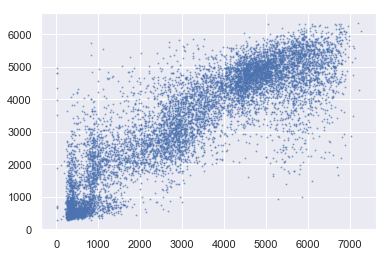


CV score (95 perc. CI): 0.74 (+/- 0.01)


In [29]:
    M =  random_search.best_estimator_
    print('Nearest Neighbors Regressor')
    trained_model_name = model_dir + data_name
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    Xsplit_train, Xsplit_valid, Ysplit_train, Ysplit_valid = train_test_split(X_train, Y_train)
    M.fit(Xsplit_train, Ysplit_train)                     
    Y_hat_train = M.predict(Xsplit_train) # Optional, not really needed to test on taining examples
    Y_hat_valid = M.predict(Xsplit_valid)
    Y_hat_test = M.predict(D.data['X_test'])
    result_name = result_dir + data_name
    from data_io import write
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    metric_name, scoring_function = get_metric()
    print('Using scoring metric:', metric_name)
    print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Y_hat_train))
    print('Validing score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_valid, Y_hat_valid))
    print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Ysplit_train, Ysplit_train))
    plt.scatter(Ysplit_valid, Y_hat_valid, alpha ='0.5', s = 1 )
    plt.show()
    scores = cross_val_score(M, Xsplit_train, Ysplit_train, cv=5, scoring=make_scorer(scoring_function))
    print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
      

In [ ]:
"""Our final models are the 'Decision Tree' and 'Nearest Neighbors', using the hyper-parameters provided by
the Random Search method. """

In [ ]:
#M = model()
#trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)                  

<div>
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [ ]:
#X_train = D.data['X_train']
#Y_train = D.data['Y_train']
#M.fit(X_train, Y_train)                     
#Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
#Y_hat_valid = M.predict(D.data['X_valid'])
#Y_hat_test = M.predict(D.data['X_test'])

In [ ]:
#print(Y_hat_train)

<div>
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [ ]:
#M.save(trained_model_name)                 
#result_name = result_dir + data_name
#from data_io import write
#write(result_name + '_train.predict', Y_hat_train)
#write(result_name + '_valid.predict', Y_hat_valid)
#write(result_name + '_test.predict', Y_hat_test)
#!ls $result_name*

<div>
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [ ]:
#from libscores import get_metric
#metric_name, scoring_function = get_metric()
#print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
# ??scoring_function

<div>
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [ ]:
#print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
#print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

You can add here other scores and result visualization.

In [ ]:
#plt.scatter(Y_train, Y_hat_train, alpha ='0.5', s = 1 )
#plt.show()

<div>
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [ ]:
#from sklearn.metrics import make_scorer
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
#print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

<div>
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [ ]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

<div>
Also test the scoring program:
    </div>

In [ ]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

<div>
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)